## Data Loading and Setup

In [ ]:
# Importing librares for analyzation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Data Cleaning

In [ ]:
#Dropping columns that are not necessary for analysis
df.drop(['AnyHealthcare', 'CholCheck', 'NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Education','Income'], axis=1, inplace=True)

#Renaming columns
df.rename(columns={'Diabetes_012':'Diabetes',
                   'HeartDiseaseorAttack':'Heart_disease',
                   'Sex':'Gender',
                   'HighBP':'high_bp',
                   'HighChol':'high_chol',
                   'HvyAlcoholConsump':'high_alcohol_consump',
                   'PhysActivity':'phys_activ'}, inplace=True)

In [ ]:
# Lower casing columns for ease of use
df.columns = df.columns.str.lower()

In [ ]:
# Viewing columns
df.columns

Index(['diabetes', 'high_bp', 'high_chol', 'bmi', 'smoker', 'stroke',
       'heart_disease', 'phys_activ', 'fruits', 'veggies',
       'high_alcohol_consump', 'gender', 'age'],
      dtype='object')

In [ ]:
df.head()

,diabetes,high_bp,high_chol,bmi,smoker,stroke,heart_disease,phys_activ,fruits,veggies,high_alcohol_consump,gender,age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0


In [ ]:
# Ensuring there is no missing values in features
df.isnull().sum()

,0
diabetes,0
high_bp,0
high_chol,0
bmi,0
smoker,0
stroke,0
heart_disease,0
phys_activ,0
fruits,0
veggies,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0.0,213703
2.0,35346
1.0,4631


In [ ]:
# Combining entries for 'prediabetes' and 'diabetes
# The reason why I encoded '2.0 = diabetes' to '1.0' is to create a more balanced class

df['diabetes'] = df['diabetes'].map({0.0:0.0, 1.0:1.0, 2.0:1.0})

In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0.0,213703
1.0,39977


In [ ]:
# Viewing the unique entries for gender
print(df['gender'].value_counts())
print()

gender
0.0    141974
1.0    111706
Name: count, dtype: int64



In [ ]:
# Viewing unique entries for age
df['age'].unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [ ]:
# Renaming gender entries from 0 to Female and 1 to Male for clarity
df['gender'] = df['gender'].map({0:'Female',1:'Male'})

# Renaming diabetes entries from 0 to No Diabets, 1 to Prediabetes, and 2 to Diabetes
df['diabetes'] = df['diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Renaming age entries to distinguish which numbers fall into which age group according to the raw dataset codebook
df['age'] = df['age'].map({1.0:'18-24',
                           2.0:'25-29',
                           3.0:'30-34',
                           4.0:'35-39',
                           5.0:'40–44',
                           6.0:'45–49',
                           7.0:'50–54',
                           8.0:'55–59',
                           9.0:'60–64',
                           10.0:'65–69',
                           11.0:'70–74',
                           12.0:'75–79',
                           13.0:'80 and above'})

In [ ]:
df.head()

,diabetes,high_bp,high_chol,bmi,smoker,stroke,heart_disease,phys_activ,fruits,veggies,high_alcohol_consump,gender,age
0,No Diabetes,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Female,60–64
1,No Diabetes,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Female,50–54
2,No Diabetes,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Female,60–64
3,No Diabetes,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Female,70–74
4,No Diabetes,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Female,70–74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   diabetes              253680 non-null  object 
 1   high_bp               253680 non-null  float64
 2   high_chol             253680 non-null  float64
 3   bmi                   253680 non-null  float64
 4   smoker                253680 non-null  float64
 5   stroke                253680 non-null  float64
 6   heart_disease         253680 non-null  float64
 7   phys_activ            253680 non-null  float64
 8   fruits                253680 non-null  float64
 9   veggies               253680 non-null  float64
 10  high_alcohol_consump  253680 non-null  float64
 11  gender                253680 non-null  object 
 12  age                   253680 non-null  object 
dtypes: float64(10), object(3)
memory usage: 25.2+ MB


## Exploratory Data Analysis

In [ ]:
# Viewing descriptics of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
high_bp,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
high_chol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
bmi,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
heart_disease,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
phys_activ,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0
high_alcohol_consump,253680.0,0.056197,0.230302,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Groubing by diabetes and gender
df.groupby(['diabetes','gender']).size().unstack()

gender,Female,Male
diabetes,,
Diabetes,21015,18962
No Diabetes,120959,92744


In [ ]:
# Grouping by smoker and gender
df.groupby(['smoker','gender']).size().unstack()

gender,Female,Male
smoker,,
0.0,84915,56342
1.0,57059,55364


In [ ]:
# Grouping by physical activity and gender
df.groupby(['phys_activ', 'diabetes']).size().unstack()

diabetes,Diabetes,No Diabetes
phys_activ,,
0.0,14548,47212
1.0,25429,166491


In [ ]:
# Grouping by smoker and diabetes
df.groupby(['smoker', 'diabetes']).size().unstack()

diabetes,Diabetes,No Diabetes
smoker,,
0.0,19378,121879
1.0,20599,91824


In [ ]:
# Grouping by gender and age
df.groupby(['diabetes','age']).size().sort_values(ascending=False).unstack()

age,18-24,25-29,30-34,35-39,40–44,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80 and above
diabetes,,,,,,,,,,,,,
Diabetes,99,194,386,768,1214,2054,3506,4813,6435,7255,5743,3848,3662
No Diabetes,5601,7404,10737,13055,14943,17765,22808,26019,26809,24939,17790,12132,13701


## Data Visualization

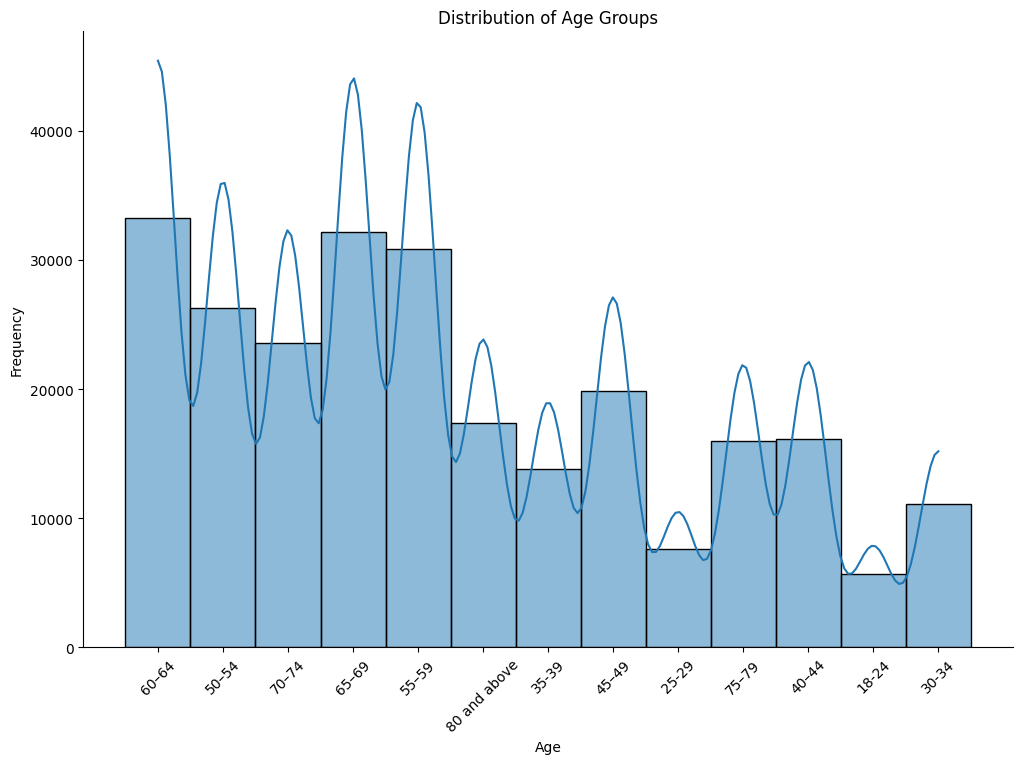

In [ ]:
#Histogram distribution of Age Groups
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='age', kde=True)

plt.title('Distribution of Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

sns.despine()
plt.show()

In [ ]:
# Creating a groupby to count which genders have diabetes or no diabetes
diabates_by_gender = df.groupby(['gender', 'diabetes']).size().reset_index(name='count')
diabates_by_gender.columns = ['gender', 'diabetes','count']

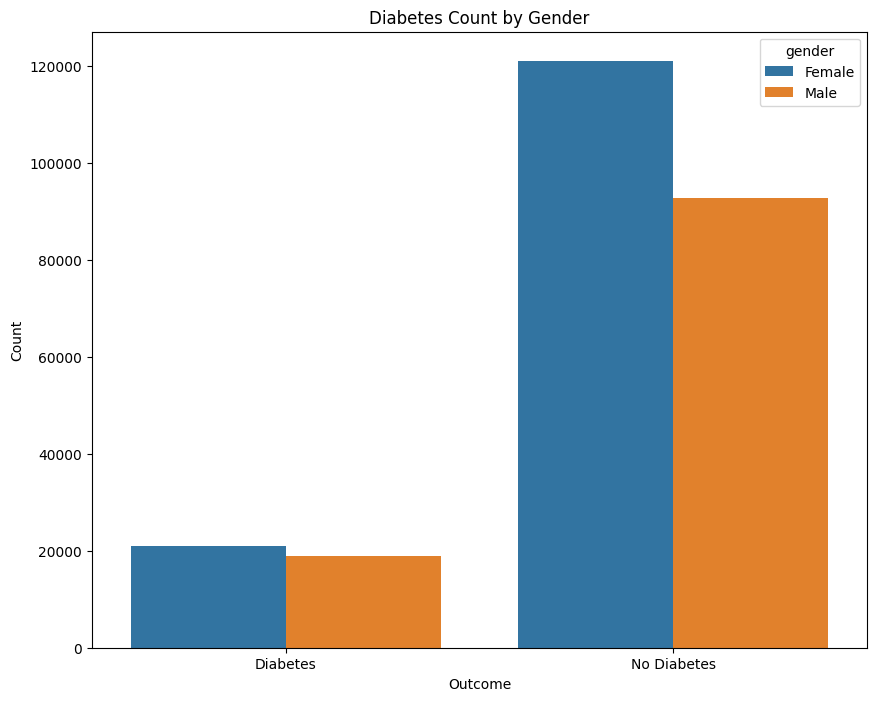

In [ ]:
#Barplot creation for Diabetes by Gender
plt.figure(figsize=(10, 8))
sns.barplot(data=diabates_by_gender, x='diabetes', y='count', hue='gender')

plt.title('Diabetes Count by Gender')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [ ]:
# Creating correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

In [ ]:
# Generating a mask for the upper-triangle of the Correlation Matrix
import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

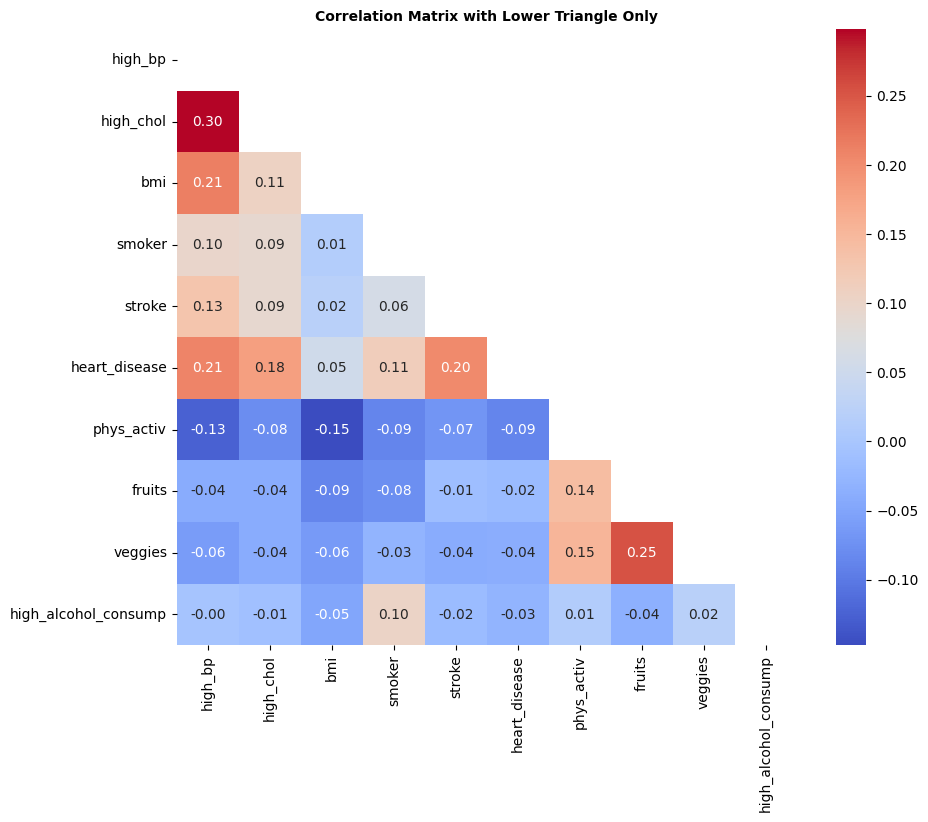

In [ ]:
#Heatmap of features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Lower Triangle Only', fontsize=10, weight='bold')
plt.show()

## Data Preparation for Model

In [ ]:
df.head()

,diabetes,high_bp,high_chol,bmi,smoker,stroke,heart_disease,phys_activ,fruits,veggies,high_alcohol_consump,gender,age
0,No Diabetes,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Female,60–64
1,No Diabetes,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Female,50–54
2,No Diabetes,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Female,60–64
3,No Diabetes,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Female,70–74
4,No Diabetes,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Female,70–74


In [ ]:
# Encoding genders to numerical values
df['gender'] = df['gender'].map({'Female':0.0,'Male':1.0})

# Encoding diabetes to numerical values
df['diabetes'] = df['diabetes'].map({'No Diabetes':0.0, 'Diabetes':1.0})

In [ ]:
# Viewing balance for diabetes
df['diabetes'].value_counts()

,count
diabetes,
0.0,213703
1.0,39977


In [ ]:
# Since the dataset is still imbalanced...
# Undersampling the majority outcome could improve model performance

# Separating the classes
df_no_diabetes = df[df['diabetes'] == 0]
df_diabetes = df[df['diabetes'] == 1]

In [ ]:
# Undersample the majority class (no diabetes) to 43,000
df_no_diabetes_sampled = df_no_diabetes.sample(n=43000, random_state=42)

# Combine with the minority class (diabetes)
df_balanced = pd.concat([df_no_diabetes_sampled, df_diabetes], axis=0)

# Shuffle the resulting dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_balanced['diabetes'].value_counts()

,count
diabetes,
0.0,43000
1.0,39977


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instantiating the encoder
encoder = OneHotEncoder(drop='first')

In [ ]:
# Select our categorical columns
categorical_columns = ['age']

# Fitting the encoder and transforming the categorical columns
encoded_features = encoder.fit_transform(df_balanced[categorical_columns])

In [ ]:
# Extracting feature names
feature_names = encoder.get_feature_names_out(categorical_columns)
feature_names

array(['age_25-29', 'age_30-34', 'age_35-39', 'age_40–44', 'age_45–49',
       'age_50–54', 'age_55–59', 'age_60–64', 'age_65–69', 'age_70–74',
       'age_75–79', 'age_80 and above'], dtype=object)

In [ ]:
# Converting the resulting sparse matrix into a DataFrame for ease of use
encoded_df = pd.DataFrame(encoded_features.toarray(),columns=feature_names)

In [ ]:
# Dropping the original categorical columns and concatenate the OHE columns
df_balanced = df_balanced.drop(categorical_columns, axis=1)

df_balanced = pd.concat([df_balanced, encoded_df], axis=1)

In [ ]:
# Viewing balanced dataset
df_balanced.head()

,diabetes,high_bp,high_chol,bmi,smoker,stroke,heart_disease,phys_activ,fruits,veggies,...,age_35-39,age_40–44,age_45–49,age_50–54,age_55–59,age_60–64,age_65–69,age_70–74,age_75–79,age_80 and above
0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,30.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,46.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Training

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Assigning feature variables and dropping target variable
X = df_balanced.drop('diabetes', axis=1)

# Assigning target variable
y = df_balanced['diabetes']

In [ ]:
# Running train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## Neural Networks

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler to the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# # Train NN Classifier
# from sklearn.neural_network import MLPClassifier

In [ ]:
# mlpc = MLPClassifier()

In [ ]:
# param_grid = {
#     'hidden_layer_sizes' : [(10,), (10, 5, 10)],
#     'activation' : ['tanh', 'relu']
# }

In [ ]:
# grid_search = GridSearchCV(mlpc, param_grid=param_grid, cv=3)

In [ ]:
# grid_search.fit(X_train_scaled, y_train)

In [ ]:
# pd.DataFrame(grid_search.cv_results_)

In [ ]:
# y_pred = grid_search.predict(X_test_scaled)

In [ ]:
# y_pred_train = grid_search.predict(X_train_scaled)

## Naive Bayes Model Creation

In [ ]:
# from sklearn.naive_bayes import CategoricalNB

In [ ]:
# NB = CategoricalNB()

In [ ]:
# NB.fit(X_train, y_train)

In [ ]:
# # Making predicitions
# y_pred = NB.predict(X_test)

# y_pred_train = NB.predict(X_train)

## KNN Model Creation

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler to the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# # Importing K-Nearest Neighbors
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors= 5)

# # Training the model
# knn.fit(X_train_scaled, y_train)

In [ ]:
# # Making predicitions
# y_pred = knn.predict(X_test_scaled)

In [ ]:
# y_pred_train = knn.predict(X_train_scaled)

## Logistic Regession Model Creation (Best Performance)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Making predicitions
y_pred = lr_model.predict(X_test_scaled)

y_pred_train = lr_model.predict(X_train_scaled)

## Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Evaluating  the classifier to make sure there is no overfitting
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

Training Accuracy: 0.7199180483101768
Testing Accuracy: 0.7242709086526874


In [ ]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[9322, 3500],
       [3364, 8708]])

In [ ]:
# Running metrics and outputting them
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing out metrics
print(f'Accuracy score: {accuracy}')
print(f'Precision score: {precision}')
print(f'Recall score: {recall}')
print(f'f1-score: {f1}')

Accuracy score: 0.7242709086526874
Precision score: 0.713302752293578
Recall score: 0.7213386348575216
f1-score: 0.7172981878088962


In [ ]:
# Importing Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['No diabetes: 0', 'Diabetes: 1']))

                precision    recall  f1-score   support

No diabetes: 0       0.73      0.73      0.73     12822
   Diabetes: 1       0.71      0.72      0.72     12072

      accuracy                           0.72     24894
     macro avg       0.72      0.72      0.72     24894
  weighted avg       0.72      0.72      0.72     24894



In [ ]:
# Importing ROC Curve and running it
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

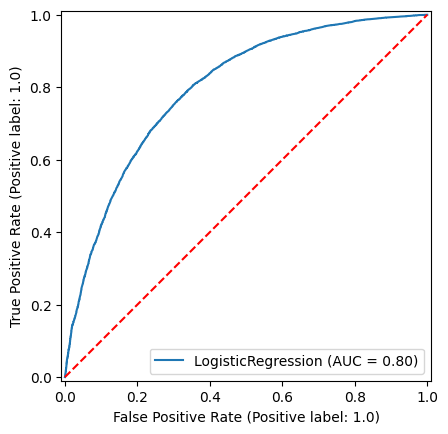

In [ ]:
# Creating Reciever Operating Characteristic (ROC) Curve
roc_display = RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

Website for Dataset

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

In [ ]:
!jupyter nbconvert --to html /content/Dylan_Gonzalez_FinalProject.ipynb

[NbConvertApp] Converting notebook /content/Dylan_Gonzalez_FinalProject.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 736155 bytes to /content/Dylan_Gonzalez_FinalProject.html
